In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
save_TSD = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

# Across Subjects

In [3]:
df_sub = pd.read_csv(save_TSD+'/diff_results/across_sub0_diff.csv')
df_sub

,Unnamed: 0,Loc_0,Loc_1,Loc_2
0,Participant_1,0.092483,0.110490,0.093706
1,Participant_2,0.147028,0.104545,0.091958
2,Participant_3,0.123601,0.157343,0.123776
3,Participant_4,0.133042,0.100175,0.057168


In [4]:
df_sub1 = pd.read_csv(save_TSD+'/diff_results/across_sub1_diff.csv')
df_sub1

,Unnamed: 0,Loc_0,Loc_1,Loc_2
0,Participant_2,0.144406,0.090734,0.034965
1,Participant_3,0.167657,0.072552,0.114336
2,Participant_4,0.086713,0.095629,0.165909
3,Participant_0,0.065035,0.115909,0.103671


In [5]:
df_sub2 = pd.read_csv(save_TSD+'/diff_results/across_sub2_diff.csv')
df_sub2

,Unnamed: 0,Loc_0,Loc_1,Loc_2
0,Participant_3,0.051224,0.070979,0.087587
1,Participant_4,0.207692,0.176049,0.147727
2,Participant_0,0.158392,0.112413,0.091608
3,Participant_1,0.101224,0.040385,0.016434


In [6]:
df_sub3 = pd.read_csv(save_TSD+'/diff_results/across_sub3_diff.csv')
df_sub3

,Unnamed: 0,Loc_0,Loc_1,Loc_2
0,Participant_4,0.207343,0.143881,0.283392
1,Participant_0,0.111888,0.098077,0.141434
2,Participant_1,0.101399,0.109615,0.090210
3,Participant_2,0.117657,0.076224,0.068182


In [7]:
df_sub4 = pd.read_csv(save_TSD+'/diff_results/across_sub4_diff.csv')
df_sub4

,Unnamed: 0,Loc_0,Loc_1,Loc_2
0,Participant_0,0.068881,0.114860,0.084615
1,Participant_1,0.038811,0.091958,0.093357
2,Participant_2,0.129196,0.126573,0.079720
3,Participant_3,0.113287,0.095455,0.209790


In [8]:
df_sub_mean = pd.DataFrame(df_sub.mean(axis=1), columns=['Start_at_0'])
df_sub_mean.index = df_sub.iloc[:,0]
df_sub1_mean = pd.DataFrame(df_sub1.mean(axis=1), columns=['Start_at_1'])
df_sub1_mean.index = df_sub1.iloc[:,0]
df_sub2_mean = pd.DataFrame(df_sub2.mean(axis=1), columns=['Start_at_2'])
df_sub2_mean.index = df_sub2.iloc[:,0]
df_sub3_mean = pd.DataFrame(df_sub3.mean(axis=1), columns=['Start_at_3'])
df_sub3_mean.index = df_sub3.iloc[:,0]
df_sub4_mean = pd.DataFrame(df_sub4.mean(axis=1), columns=['Start_at_4'])
df_sub4_mean.index = df_sub4.iloc[:,0]

from functools import reduce

df = [df_sub4_mean, df_sub_mean, df_sub1_mean, df_sub2_mean, df_sub3_mean]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Unnamed: 0'],
                                            how='outer'), df)
df_merged = df_merged[[f'Start_at_{i}' for i in range(5)]]

display(df_merged)

,Start_at_0,Start_at_1,Start_at_2,Start_at_3,Start_at_4
Unnamed: 0,,,,,
Participant_0,NaN,0.094872,0.120804,0.117133,0.089452
Participant_1,0.098893,NaN,0.052681,0.100408,0.074709
Participant_2,0.114510,0.090035,NaN,0.087354,0.111830
Participant_3,0.134907,0.118182,0.069930,NaN,0.139510
Participant_4,0.096795,0.116084,0.177156,0.211538,NaN


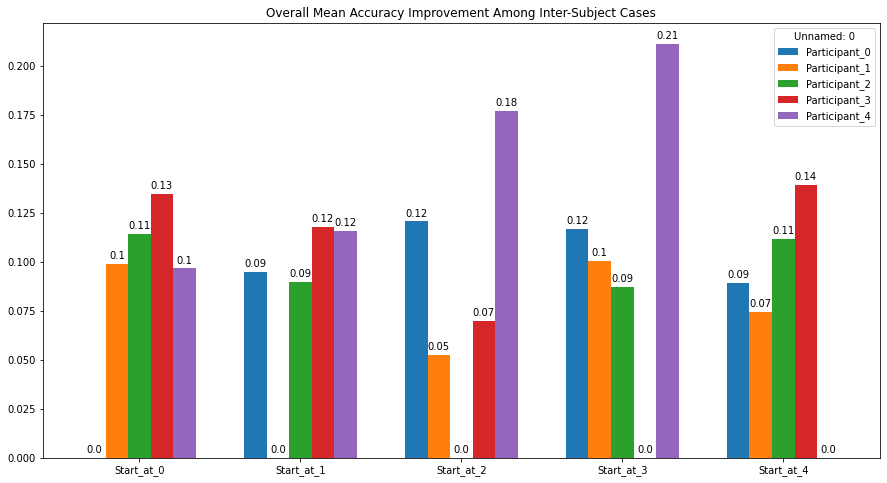

In [9]:
ax = df_merged.transpose().plot(kind='bar', figsize=(15,8), width=0.7, linewidth=8)
plt.title('Overall Mean Accuracy Improvement Among Inter-Subject Cases')
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),2)), (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='center', xytext=(0, 8),textcoords='offset points')
plt.show()

In [10]:
df_sub=df_sub.append(df_sub1)
df_sub=df_sub.append(df_sub2)
df_sub=df_sub.append(df_sub3)
df_sub=df_sub.append(df_sub4)
df_sub=df_sub.drop(["Unnamed: 0"], axis=1)
df_sub

,Loc_0,Loc_1,Loc_2
0,0.092483,0.110490,0.093706
1,0.147028,0.104545,0.091958
2,0.123601,0.157343,0.123776
3,0.133042,0.100175,0.057168
0,0.144406,0.090734,0.034965
1,0.167657,0.072552,0.114336
2,0.086713,0.095629,0.165909
3,0.065035,0.115909,0.103671
0,0.051224,0.070979,0.087587
1,0.207692,0.176049,0.147727


In [11]:
print("mean = ", np.mean(df_sub.to_numpy().flatten()))
print("err = ", np.std(df_sub.to_numpy().flatten()))

mean =  0.11083916083916082
err =  0.04625512039912514


In [12]:
print("largest improvement = ", df_sub.max().max(), " at location 2 when base model is trained from subejct 3 and SCADANN model is tested on subject 4")
print("smallest improvement = ", df_sub.min().min(), " at location 2 when base model is trained from subejct 2 and SCADANN model is tested on subject 3")

largest improvement =  0.2833916083916084  at location 2 when base model is trained from subejct 3 and SCADANN model is tested on subject 4
smallest improvement =  0.0164335664335664  at location 2 when base model is trained from subejct 2 and SCADANN model is tested on subject 3


# Across Wearing Locations

In [13]:
df_loc = pd.read_csv(save_TSD+'/diff_results/across_loc_diff.csv')
df_loc

,Unnamed: 0,Participant_0,Participant_1,Participant_2,Participant_3,Participant_4
0,Loc_1,0.036014,0.147378,0.098427,0.051573,0.108741
1,Loc_2,0.100699,0.136713,0.095280,0.105944,0.048601


In [14]:
df_loc=df_loc.drop(["Unnamed: 0"], axis=1)
print("mean = ", np.mean(df_loc.to_numpy().flatten()))
print("err = ", np.std(df_loc.to_numpy().flatten()))

mean =  0.09293706293706289
err =  0.03508817477160058


In [15]:
print("largest improvement = ", df_loc.max().max(), " at location 1 when testing on subject 1")
print("smallest improvement = ", df_loc.min().min(), " at location 1 when testing on subject 0")

largest improvement =  0.1473776223776224  at location 1 when testing on subject 1
smallest improvement =  0.036013986013986  at location 1 when testing on subject 0


# Across Days

In [16]:
df_day = pd.read_csv(save_TSD+'/diff_results/across_day_loc0_diff.csv')
df_day

,Unnamed: 0,Participant_0,Participant_1,Participant_2,Participant_3,Participant_4
0,Day_1,-0.022727,0.101399,0.034965,0.043706,0.118881
1,Day_2,0.153846,0.113636,0.101399,0.054196,0.150350
2,Day_3,-0.012238,0.169580,0.111888,0.073427,0.120629
3,Day_4,0.062937,0.082168,0.054196,0.064685,0.160839
4,Day_5,0.061189,0.085664,0.106643,0.050699,0.131119
5,Day_6,0.062937,0.258741,0.082168,0.059441,0.178322
6,Day_7,0.031469,0.104895,0.057692,0.090909,0.120629
7,Day_8,0.113636,0.220280,0.104895,0.059441,0.073427
8,Day_9,0.066434,0.097902,0.076923,0.078671,0.204545


In [17]:
df_day1 = pd.read_csv(save_TSD+'/diff_results/across_day_loc1_diff.csv')
df_day1

,Unnamed: 0,Participant_0,Participant_1,Participant_2,Participant_3,Participant_4
0,Day_1,0.073427,0.110140,0.082168,0.082168,0.045455
1,Day_2,0.106643,0.103147,0.052448,0.124126,0.069930
2,Day_3,0.211538,0.024476,0.073427,0.059441,0.131119
3,Day_4,0.054196,0.117133,0.020979,0.157343,0.106643
4,Day_5,0.108392,0.089161,0.068182,0.082168,0.174825
5,Day_6,0.160839,0.122378,0.055944,0.185315,0.188811
6,Day_7,0.101399,0.073427,0.057692,0.055944,0.173077
7,Day_8,0.094406,0.089161,0.024476,0.075175,0.180070
8,Day_9,0.087413,0.120629,0.048951,0.069930,0.090909


In [18]:
df_day2 = pd.read_csv(save_TSD+'/diff_results/across_day_loc2_diff.csv')
df_day2

,Unnamed: 0,Participant_0,Participant_1,Participant_2,Participant_3,Participant_4
0,Day_1,0.120629,0.078671,0.017483,0.097902,0.040210
1,Day_2,0.094406,0.075175,0.027972,0.029720,0.054196
2,Day_3,0.145105,0.020979,0.066434,0.040210,0.131119
3,Day_4,0.080420,0.089161,0.029720,0.092657,0.127622
4,Day_5,0.138112,0.099650,0.096154,0.076923,0.146853
5,Day_6,0.171329,0.122378,0.068182,0.117133,0.199301
6,Day_7,0.157343,0.078671,0.080420,0.087413,0.162587
7,Day_8,0.166084,0.055944,0.050699,0.085664,0.199301
8,Day_9,0.047203,0.201049,0.040210,0.092657,0.101399


In [19]:
df_day=df_day.append(df_day1)
df_day=df_day.append(df_day2)
df_day=df_day.drop(["Unnamed: 0"], axis=1)
df_day

,Participant_0,Participant_1,Participant_2,Participant_3,Participant_4
0,-0.022727,0.101399,0.034965,0.043706,0.118881
1,0.153846,0.113636,0.101399,0.054196,0.150350
2,-0.012238,0.169580,0.111888,0.073427,0.120629
3,0.062937,0.082168,0.054196,0.064685,0.160839
4,0.061189,0.085664,0.106643,0.050699,0.131119
5,0.062937,0.258741,0.082168,0.059441,0.178322
6,0.031469,0.104895,0.057692,0.090909,0.120629
7,0.113636,0.220280,0.104895,0.059441,0.073427
8,0.066434,0.097902,0.076923,0.078671,0.204545
0,0.073427,0.110140,0.082168,0.082168,0.045455


In [20]:
print("mean = ", np.mean(df_day.to_numpy().flatten()))
print("err = ", np.std(df_day.to_numpy().flatten()))

mean =  0.0963221963221963
err =  0.05010610201442941


In [21]:
print("largest improvement = ", df_day.max().max(), " at location 0 when testing on subject 1 on day 6")
print("smallest improvement = ", df_day.min().min(), " at location 0  when testing on subject 0 on day 1")

largest improvement =  0.2587412587412587  at location 0 when testing on subject 1 on day 6
smallest improvement =  -0.0227272727272728  at location 0  when testing on subject 0 on day 1


,Mean,Std.
Across Days,0.096322,0.050106
Across Locations,0.092937,0.035088
Across Subjects,0.110839,0.046255


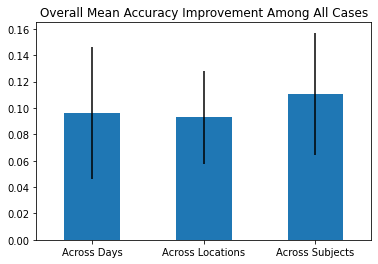

In [29]:

day_std = np.std(df_day.to_numpy().flatten())
loc_std = np.std(df_loc.to_numpy().flatten())
sub_std = np.std(df_sub.to_numpy().flatten())
std = [day_std, loc_std, sub_std]
mean = [np.mean(df_day.to_numpy().flatten()), np.mean(df_loc.to_numpy().flatten()), np.mean(df_sub.to_numpy().flatten())]

df = pd.DataFrame(np.array([mean, std]).T, index = ['Across Days', 'Across Locations', 'Across Subjects'], columns=['Mean', 'Std.'])
display(df)

fig = df[['Mean']].plot(kind='bar', yerr=df[['Std.']].values.T, alpha = 1,error_kw=dict(ecolor='k'), legend=False)
plt.xticks(rotation=0)
plt.title('Overall Mean Accuracy Improvement Among All Cases')
plt.show()z